In [120]:
import numpy as np
import pandas as pd

In [121]:
df= pd.read_csv('Boston.csv')
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [122]:
df.drop(df.columns[[1,2,3,4,5,6,8,9,10,11,12]],axis=1,inplace=True)
df.head()
df.iloc[:,0].count()
df.head()

,Crime Rate,Distance to Employment Centres,median home price
0,0.00632,4.0900,24.0
1,0.02731,4.9671,21.6
2,0.02729,4.9671,34.7
3,0.03237,6.0622,33.4
4,0.06905,6.0622,36.2


In [123]:
from sklearn.model_selection import train_test_split 

In [124]:
X= df.drop(df.columns[2],axis=1)
y= df[df.columns[2]]
df.head()
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
def batch_gd(weights,bias,x,y,lr):
    y_pred =np.dot(x,weights)+bias
    error= y-y_pred
    wd =2*np.dot(x.T,error)/len(y)
    bd =2*error.sum()/len(y)
    weights +=lr*wd
    bias +=lr*bd
    return weights,bias

148.2385858626659
105.31453847734693
88.40953005733832
81.55496139676143
78.60994709891493
77.20543500989838
76.42209832528688
75.89933722106925
75.49297401388225
75.14343964006952
74.824795554931
74.52486092681377
74.23735350341099
73.9587022858454
73.68669965120138
73.4198938175923
73.1572905449046
72.89819171272686
72.6420995725792
72.38865567911598
72.13759995315272
71.88874238139064
71.64194309906945
71.39709823165835
71.15412977523069
70.9129783420727
70.67359795199135
70.43595228923387
70.20001201136834
69.96575281397024
69.73315403862358
69.50219767159616
69.2728676234746
69.04514921087262
68.81902878348205
68.59449345566505
68.37153091324181
68.1501292743657
67.930276989304
67.71196276820368
67.49517552898743
67.27990435973047
67.06613849145367
66.85386727841053
66.64308018376511
66.43376676914848
66.22591668700642
66.01951967495513
65.81456555158293
65.61104421329243
65.40894563189256
65.2082598527305
65.00897699321318
64.8110872416098
64.61458085605754
64.41944816371418
64.2

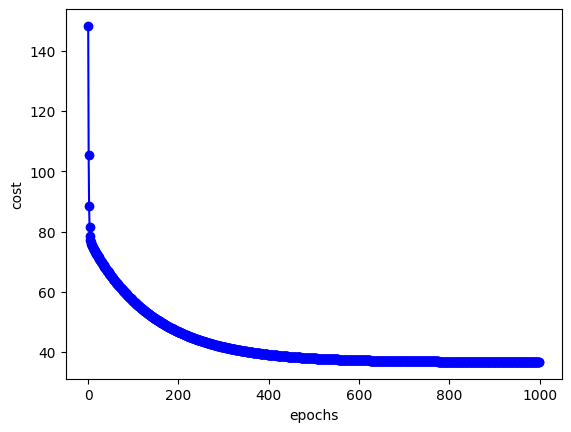

In [126]:
def costfunction(x, y, weights, bias):
    y_pred = np.dot(x, weights) + bias
    error = y - y_pred
    cost = np.mean(error ** 2) / 2
    return cost

# Initialize Parameters
epochs = 1000
weights = np.random.rand(X_train.shape[1])
bias = np.random.rand(1)
lr=0.01

t_cost =[]
# Training Loop
for i in range(epochs):
    weights, bias = batch_gd(weights, bias, X_train, y_train, lr)
    cost = costfunction(X_train, y_train, weights, bias)
    t_cost.append(cost)
    print(cost)

import matplotlib.pyplot as plt

plt.plot(range(epochs),t_cost, marker='o', linestyle='-', color='b', label='Cost Function')
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()


78.75602884860578
72.82982911558693
67.7370936486534
63.35570612408365
59.58752884228092
56.34787903444124
53.563690025107405
51.17192328830388
49.11819719632737
47.35560291797398
45.84368194891476
44.5475432343798
43.437100847980645
42.48641578493704
41.673127668920564
40.97796410734363
40.38431710179618
39.87787736440419
39.44631863817414
39.07902519671788
38.76685662926839
38.50194482060504
38.27751872968234
38.087753170322884
37.92763831518237
37.79286709145819
37.67973802310889
37.58507140798886
37.506137006455184
37.44059166686982
37.38642552835512
37.34191562678656
37.30558589031868
37.27617264918899
37.252594904108705
37.233928700804
37.21938504743914
37.2082908886543
37.200072716444495
37.194242455524446
37.1903853104046
37.188149304215685
37.18723627628373
37.18739413737559
37.18841020909104
37.19010549766933
37.19232977301832
37.194957341506246
37.19788341636331
37.20102100275422
37.204298225987806
37.20765604117473
37.21104627114012
37.21442992673097
37.2177757699853
37.221

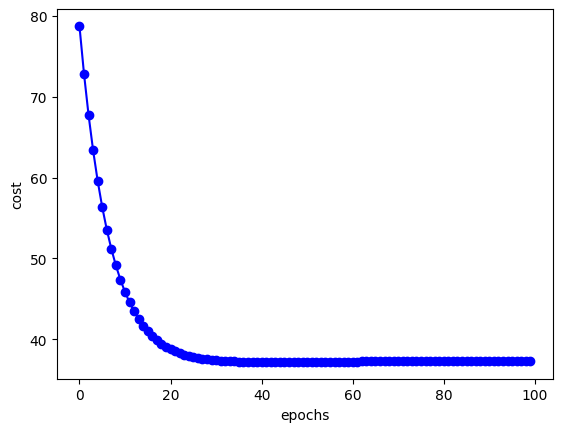

In [131]:
def stochastic(weights,bias,x,y,lr):
    for i in range(len(y)):
        e= y.iloc[i]-np.dot(x.iloc[i],weights)-bias
        weights+= lr*e*x.iloc[i]
        bias+= lr*e
    return weights,bias

weights =np.random.rand(2)
bias= np.random.rand(1)
lr=0.001
t_cost =[]
epochs=100
for i in range(epochs):
    weights, bias = stochastic(weights, bias, X_train, y_train, lr)
    cost = costfunction(X_train, y_train, weights, bias)
    t_cost.append(cost)
    print(cost)

import matplotlib.pyplot as plt

plt.plot(range(epochs),t_cost, marker='o', linestyle='-', color='b', label='Cost Function')
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

C:\Users\venka\AppData\Local\Temp\ipykernel_21348\694494766.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[0]+= lr*e*x.iloc[i,0]
C:\Users\venka\AppData\Local\Temp\ipykernel_21348\694494766.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[1]+= lr*e*x.iloc[i,1]


37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.2798876741848
37.27988767418

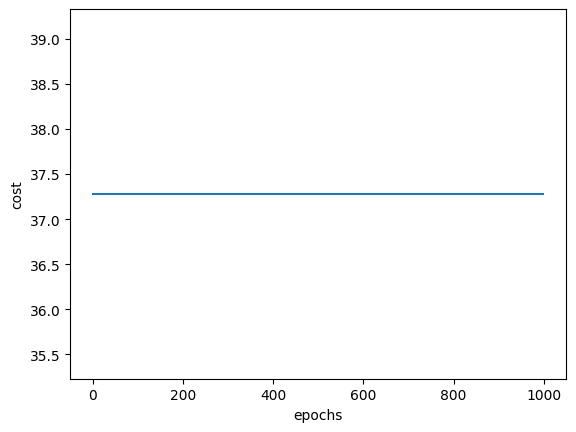

In [128]:
t_cost =[]
for i in range(epochs):
    weights, bias = stochastic(weights, bias, X_train, y_train, lr)
    cost = costfunction(X_train, y_train, weights, bias)
    t_cost.append(cost)
    print(cost)

import matplotlib.pyplot as plt

plt.plot(range(epochs),t_cost)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()


In [129]:
#accuracy

c=0
for i in range(len(y_test)):
    y_pred =np.dot(X_test,weights)+bias
    c +=1 if (y_test.iloc[i]-y_pred[i])<0.5 else 0
print(c/len(y_test)*100)

76.47058823529412


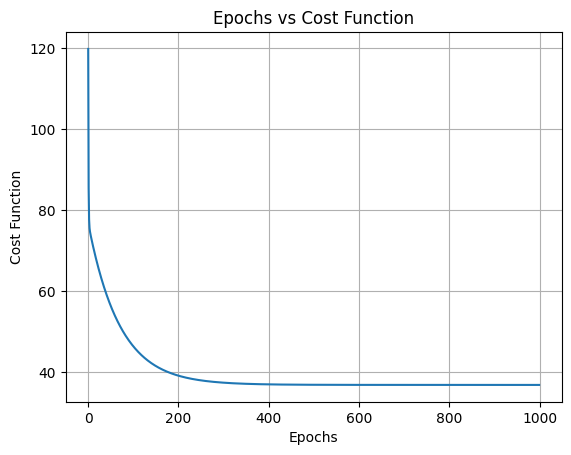

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('Boston.csv')

# Select 2 independent variables and 1 dependent variable
X = df.iloc[:, [0, 7]]   # Adjust column indexes as needed
y = df.iloc[:, -1]       # Assuming last column is dependent

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# Stochastic Gradient Descent function
def stochastic(weights, bias, x, y, lr):
    for i in range(len(y)):
        y_pred = np.dot(x[i], weights) + bias
        error = y[i] - y_pred
        
        # Update weights and bias
        weights += lr * error * x[i]
        bias += lr * error
        
    return weights, bias

# Cost function (Mean Squared Error)
def costfunction(x, y, weights, bias):
    y_pred = np.dot(x, weights) + bias
    error = y - y_pred
    cost = np.mean(error ** 2) / 2
    return cost

# Initialize Parameters
epochs = 1000
weights = np.random.rand(X_train.shape[1])
bias = np.random.rand(1)
lr = 0.0001
cost_history = []

# Training Loop
for i in range(epochs):
    weights, bias = stochastic(weights, bias, X_train, y_train, lr)
    cost = costfunction(X_train, y_train, weights, bias)
    cost_history.append(cost)  # Save cost for each epoch

# Plot Epochs vs Cost Function
plt.plot(range(epochs), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost Function')
plt.title('Epochs vs Cost Function')
plt.grid(True)
plt.show()
